# Google Playstore Data
### Complete EDA Analysis for Beginner to Advance EDA 

### **About Dataset**

**Context**

While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

**Content**

Each app (row) has values for catergory, rating, size, and more.

**Acknowledgements**

This information is scraped from the Google Play Store. This app information would not be available without it.

**Inspiration**

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# 1. Importing Libraries


In [138]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

## Data Loading and Exploaration |Cleaning 

In [139]:
## - Lets load the csv file 
df = pd.read_csv('./data/googleplaystore.csv')

- let's have a look on top 5 rows of the data 

In [140]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [141]:
# set options to be maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [142]:
print(f'The names of columns in this dataset are as follows: {df.columns}')

The names of columns in this dataset are as follows: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [143]:
print(f'The Number of Rows are: {df.shape[0]}, and columns ae {df.shape[1]}')

The Number of Rows are: 10841, and columns ae 13


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [145]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [146]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# How to make 'Size' a numeric column?

In [147]:
df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.5M                    68
2.3M                    68
2.8M                    65
3.4M                    65
32M                     63
34M                     63
3.7M                    63
40M                     62
3.9M                    62
3

In [148]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

----
## Observations:
1. 'varies with device'
2. M
3. k
----

In [149]:
df['Size'].isnull().sum()

0

- No missing values in size, we are good to go

# verify the number of values and 3 different kind of values

In [150]:
# find the values having M in them 
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8829

In [151]:
# find the values having k in them 
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [152]:
# find the values having varies with device in them 
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [153]:
len(df)

10841

In [154]:
8830 + 316 + 1695

10841

In [155]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
10                      28M
11                      12M
12                      20M
13                      21M
14                      37M
15                     2.7M
16                     5.5M
17                      17M
18                      39M
19                      31M
20                      14M
21                      12M
22                     4.2M
23                     7.0M
24                      23M
25                     6.0M
26                      25M
27                     6.1M
28                     4.6M
29                     4.2M
30                     9.2M
31                     5.2M
32                      11M
33                      11M
34                     4.2M
35                  

In [156]:
# convert the whole size column into bytes

# let's define a function

def convert_size(size):
    if isinstance(size,str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024*1024
        elif 'Varies with device' in size:
            return np.nan
    return size

In [157]:
# let's apply this function
df['Size'] = df['Size'].apply(convert_size)

In [158]:
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [159]:
# rename the column
df.rename(columns={'Size':'Size_in_Bytes'}, inplace=True)

In [160]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [161]:
df['Size_in_Bytes'] = pd.to_numeric(df['Size_in_Bytes'], errors='coerce')
df['Size_in_Mb'] = df['Size_in_Bytes'].apply(lambda x: x/(1024*1024))

In [162]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


# Let's take care of Installs 

In [163]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [164]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [165]:
df['Installs'].isnull().sum()

0

### Installs Columns:
1. Remove + sign 
2. remove , 
3. Convert the column into an integer

In [171]:
df['Installs'] =df['Installs'].apply(lambda x: x.replace('+', '')if '+' in str(x) else x)

In [172]:
df['Installs'] =df['Installs'].apply(lambda x: x.replace(',', '')if ',' in str(x) else x)

In [176]:
try:
    df['Installs'] = df['Installs'].apply(lambda x: int(x))
except ValueError:
    df['Installs'] = df['Installs'].replace('Free', np.nan).apply(lambda x: int(x) if str(x).isdigit() else x)


In [177]:
df['Installs'].value_counts()

1.000000e+06    1579
1.000000e+07    1252
1.000000e+05    1169
1.000000e+04    1054
1.000000e+03     907
5.000000e+06     752
1.000000e+02     719
5.000000e+05     539
5.000000e+04     479
5.000000e+03     477
1.000000e+08     409
1.000000e+01     386
5.000000e+02     330
5.000000e+07     289
5.000000e+01     205
5.000000e+00      82
5.000000e+08      72
1.000000e+00      67
1.000000e+09      58
0.000000e+00      15
Name: Installs, dtype: int64

In [178]:
df.describe()

,Rating,Size_in_Bytes,Installs,Size_in_Mb
count,9367.000000,9.145000e+03,1.084000e+04,9145.000000
mean,4.193338,2.256133e+07,1.546434e+07,21.516165
std,0.537431,2.368637e+07,8.502936e+07,22.589084
min,1.000000,8.704000e+03,0.000000e+00,0.008301
25%,4.000000,5.138022e+06,1.000000e+03,4.900000
50%,4.300000,1.363149e+07,1.000000e+05,13.000000
75%,4.500000,3.145728e+07,5.000000e+06,30.000000
max,19.000000,1.048576e+08,1.000000e+09,100.000000


## Price Column

In [180]:
df['Price'].value_counts()

0           10040
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$29.99          7
$24.99          7
$3.49           7
$7.99           7
$5.49           6
$19.99          6
$11.99          5
$6.49           5
$12.99          5
$8.99           5
$10.00          3
$16.99          3
$1.00           3
$2.00           3
$13.99          2
$8.49           2
$17.99          2
$1.70           2
$3.95           2
$79.99          2
$7.49           2
$9.00           2
$10.99          2
$39.99          2
$33.99          2
$19.40          1
$3.90           1
$1.96           1
$4.60           1
$15.46          1
$3.04           1
$4.29           1
$2.60           1
$3.28           1
$4.80           1
$4.59           1
$3.08           1
$28.99          1
$2.95           1
$2.90           1
$1.97           1
$200.00   

In [181]:
# let's see how many values have $ sign 
df['Price'].loc[df['Price'].str.contains('$')].value_counts().sum()

10841

In [184]:
# This code counts the number of values in the 'Price' column which contains 0 but doesn't contain $ sign
df['Price'].loc[(df['Price'].str.contains('0'))&(~df['Price'].str.contains('\$'))].value_counts().sum()

10040

In [187]:
df['Price'] =df['Price'].apply(lambda x: x.replace('$', '')if '$' in str(x) else x)

In [188]:
df['Price'].value_counts()

0           10040
0.99          148
2.99          129
1.99           73
4.99           72
3.99           63
1.49           46
5.99           30
2.49           26
9.99           21
6.99           13
399.99         12
14.99          11
4.49            9
29.99           7
24.99           7
3.49            7
7.99            7
5.49            6
19.99           6
11.99           5
6.49            5
12.99           5
8.99            5
10.00           3
16.99           3
1.00            3
2.00            3
13.99           2
8.49            2
17.99           2
1.70            2
3.95            2
79.99           2
7.49            2
9.00            2
10.99           2
39.99           2
33.99           2
19.40           1
3.90            1
1.96            1
4.60            1
15.46           1
3.04            1
4.29            1
2.60            1
3.28            1
4.80            1
4.59            1
3.08            1
28.99           1
2.95            1
2.90            1
1.97            1
200.00    

In [190]:
# now we can convert into a numeric value
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'] = df['Price'].apply(lambda x: float(x))


In [191]:
df.describe()

,Rating,Size_in_Bytes,Installs,Price,Size_in_Mb
count,9367.000000,9.145000e+03,1.084000e+04,10840.000000,9145.000000
mean,4.193338,2.256133e+07,1.546434e+07,1.027368,21.516165
std,0.537431,2.368637e+07,8.502936e+07,15.949703,22.589084
min,1.000000,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,3.145728e+07,5.000000e+06,0.000000,30.000000
max,19.000000,1.048576e+08,1.000000e+09,400.000000,100.000000


In [192]:
# convert Reviews column to numeric column
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [193]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084000e+04,9.145000e+03,1.084000e+04,10840.000000,9145.000000
mean,4.193338,4.441529e+05,2.256133e+07,1.546434e+07,1.027368,21.516165
std,0.537431,2.927761e+06,2.368637e+07,8.502936e+07,15.949703,22.589084
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


In [194]:
# using f string print min, max amd average prices of the app
print(f'The minimum price of the app is: {df.Price.min()}')
print(f'The maximum price of the app is: {df.Price.max()}')
print(f'The average price of the app is: {df.Price.mean()}')

The minimum price of the app is: 0.0
The maximum price of the app is: 400.0
The average price of the app is: 1.027368081180812


# Missing values inside the dataframe

In [196]:
# find missing values percentage in the data and sort values in decending order
df.isnull().sum().sort_values(ascending=False)/len(df)*100

Size_in_Bytes     15.644313
Size_in_Mb        15.644313
Rating            13.596532
Current Ver        0.073794
Android Ver        0.027673
Reviews            0.009224
Installs           0.009224
Type               0.009224
Price              0.009224
Content Rating     0.009224
App                0.000000
Category           0.000000
Genres             0.000000
Last Updated       0.000000
dtype: float64

In [197]:
# find total number of missing values 
df.isnull().sum().sum()

4882

<AxesSubplot: >

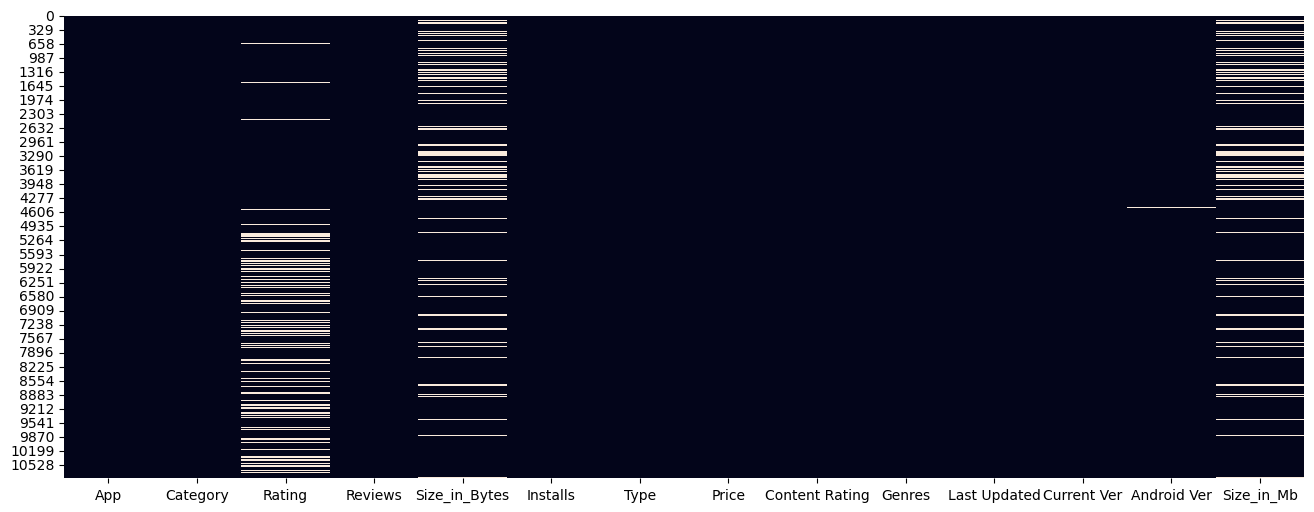

In [198]:
# plot missing values 
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(), cbar=False)


Text(0, 0.5, 'Percentage')

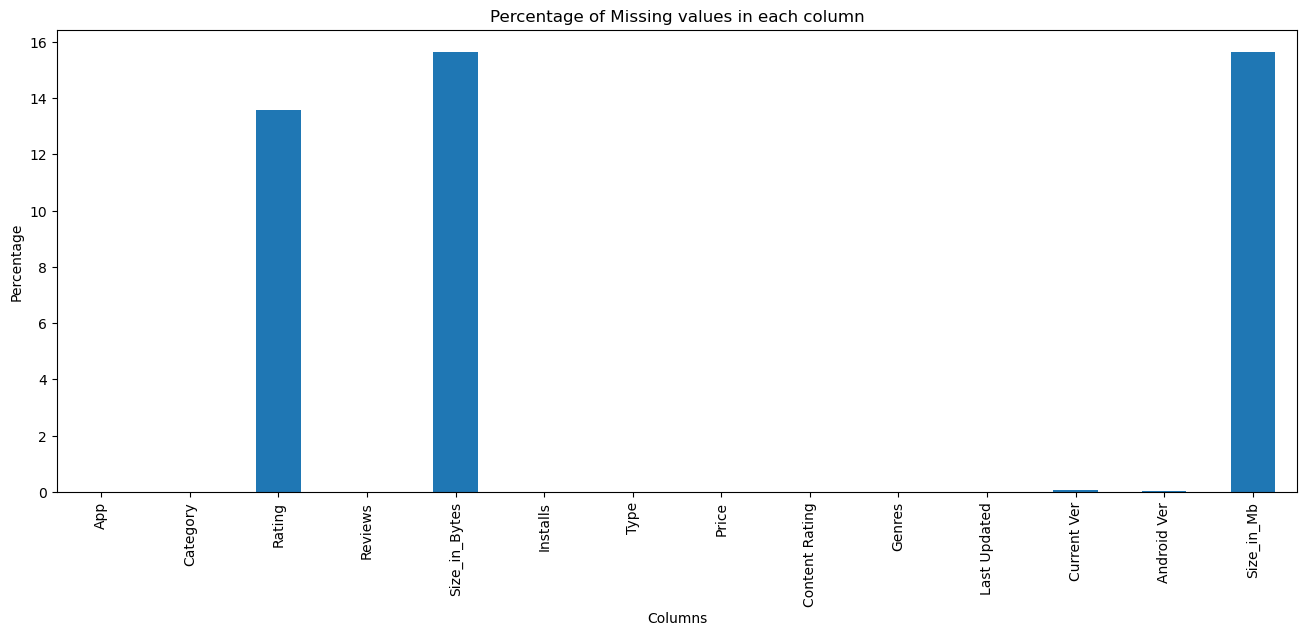

In [199]:
# make figure size 
plt.figure(figsize=(16,6))
# plot the null values by their percentage in each column
(df.isnull().sum()/len(df)*100).plot(kind='bar')
# set the title
plt.title('Percentage of Missing values in each column')
# set x and y labels
plt.xlabel('Columns')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

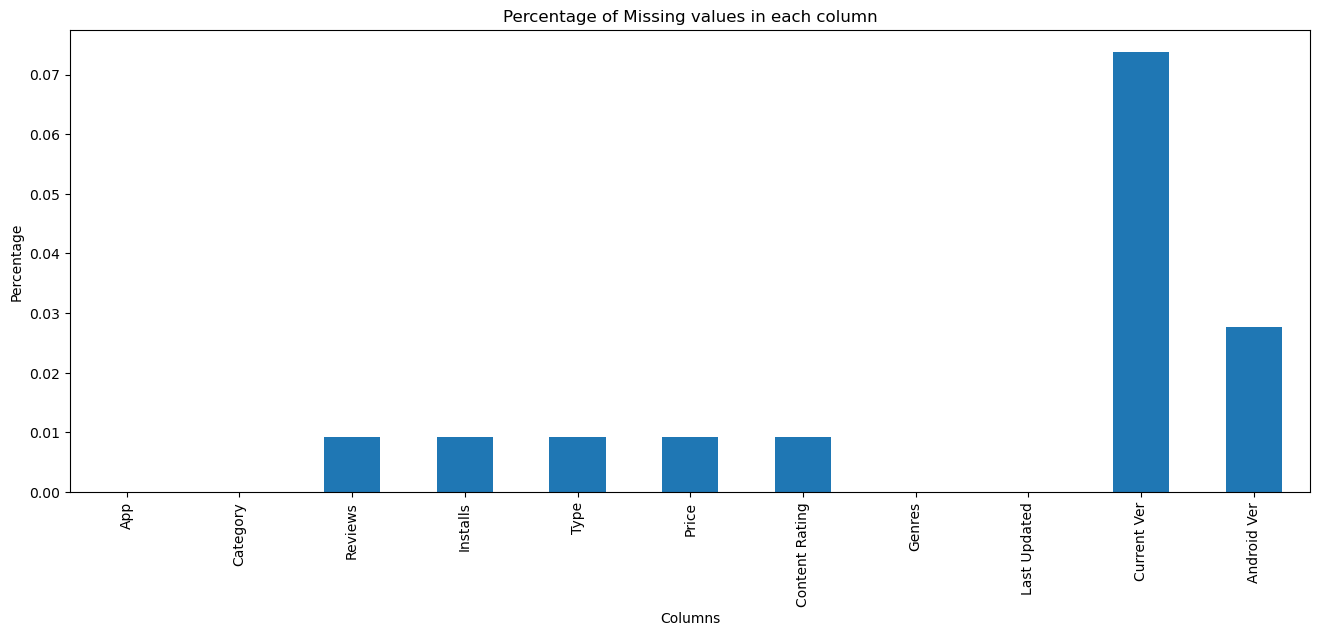

In [200]:
# plot only those values having percentage less than 1 percent
plt.figure(figsize=(16,6))
(df.isnull().sum()/len(df)*100).loc[(df.isnull().sum()/len(df)*100)<1].plot(kind='bar')
plt.title('Percentage of Missing values in each column')
plt.xlabel('Columns')
plt.ylabel('Percentage')